In [1]:
using Revise, HarmonicBalance

## Arnold tongue of a single parametron

In [2]:
@variables ω₁, ω, γ,λ, t, T, α₁, x(t)

#sympy object for the equation of motion
natural_equation = [d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3] 

dEOM = HarmonicBalance.DifferentialEquation(natural_equation, [x])

HarmonicBalance.add_harmonic!(dEOM, x, ω) # x will rotate at ω

@time averagedEOM = HarmonicBalance.get_harmonic_equations(dEOM, slow_time=T, fast_time=t)
@time problem = HarmonicBalance.Problem(averagedEOM)

 76.061054 seconds (114.38 M allocations: 6.495 GiB, 2.67% gc time, 99.32% compilation time)
 11.584182 seconds (14.30 M allocations: 818.423 MiB, 2.69% gc time, 99.32% compilation time)


2 algebraic equations for steady states
Variables: u1, v1
Parameters: α₁, ω, γ, ω₁, λ
Symbolic Jacobian: true


# 1D sweep

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:12
  # paths tracked:                  9
  # non-singular solutions (real):  5 (5)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         5 (5)


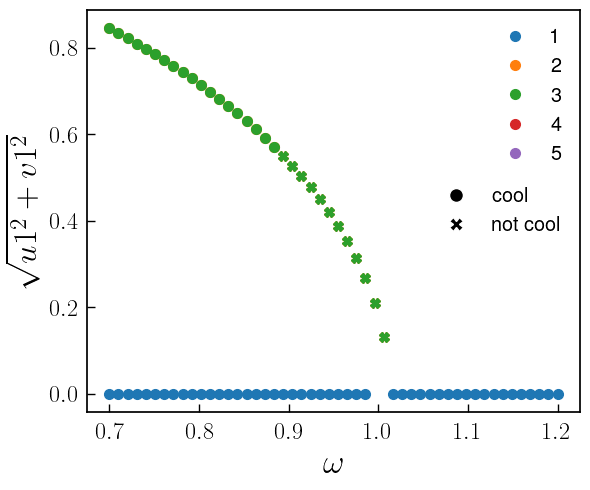

A steady state result for 50 parameter points

Solution branches:   5
   of which real:    5
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels
Binary label is not Boolean and thus was ignored

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/3fwVL/src/numpy.jl:67
/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [3]:
fixed_parameters =  ParameterList([(ω₁, 1.),(γ, 0.001 ),(α₁,  -1.),(λ,0.05)])
swept_parameters = ParameterRange(ω =>LinRange(0.7,1.2,50))

soln_1d = HarmonicBalance.get_steady_states(problem, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="naive");
print(soln_1d)
leg =HarmonicBalance.plot_1D_solutions(soln_1d, x="ω", y="sqrt(u1^2 + v1^2)", plot_only=["physical","stable","binary_labels"],save_data=true,marker_classification=["ω^15* sqrt(u1^2 + v1^2) < 0.1" , "cool"]);

In [4]:
using JLD2
lines = JLD2.load("plot_1D.jld2")

Dict{String, Any} with 4 entries:
  "markers"           => ["o", "o", "o", "o", "o", "X", "X", "X", "X", "X"]
  "sqrt(u1^2 + v1^2)" => Vector{ComplexF64}[[0.0+7.623e-56im, 6.57668e-55-1.035…
  "marker_dict"       => Dict("X"=>"not cool", "o"=>"cool")
  "ω"                 => Vector{ComplexF64}[[0.7+0.0im, 0.710204+0.0im, 0.72040…

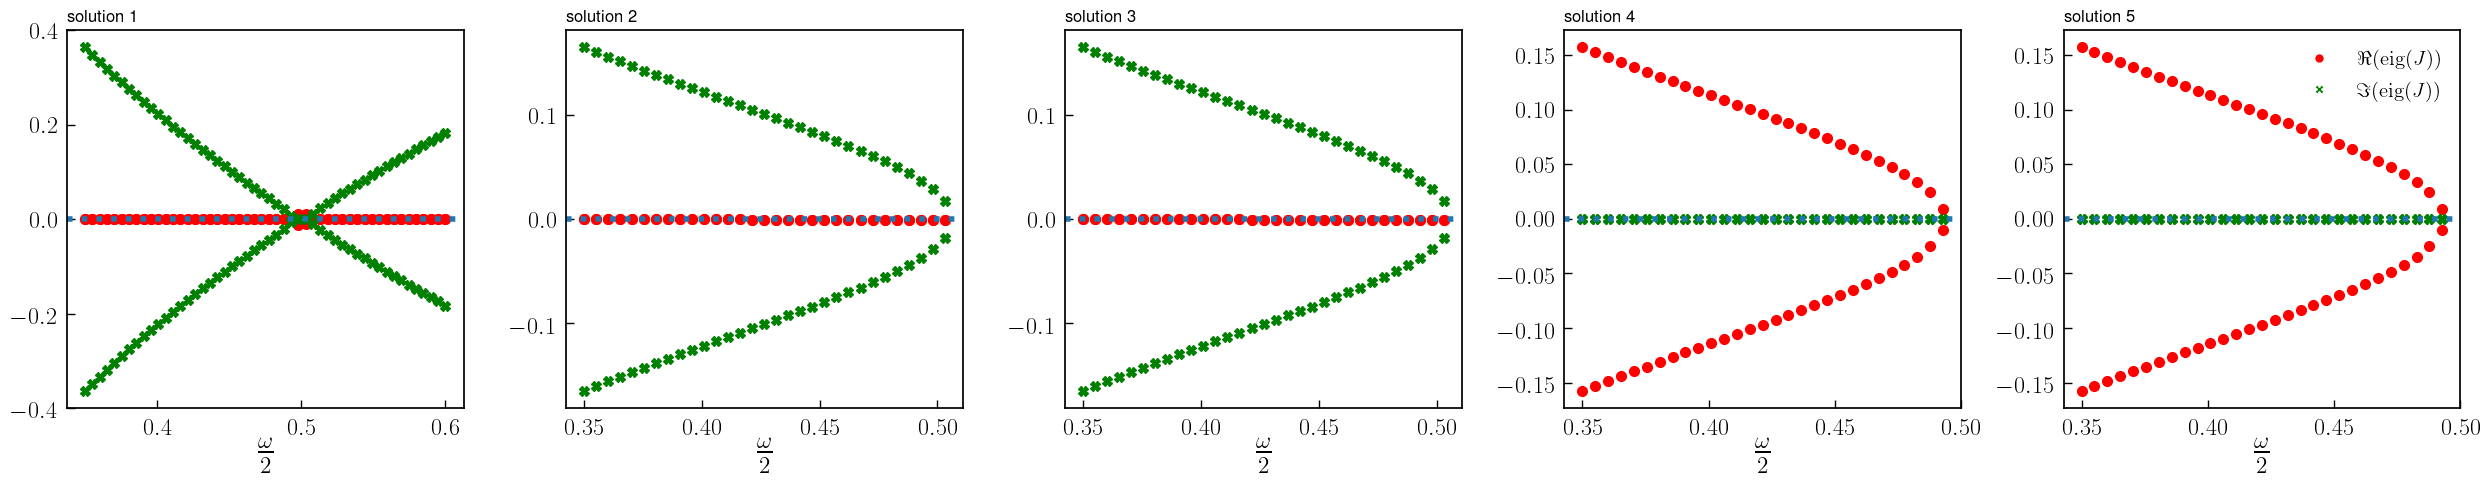

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [5]:
HarmonicBalance.plot_1D_jacobian_eigenvalues(soln_1d, x="ω/2", physical=true, stable=false,save_data=true);

In [6]:
lines = JLD2.load("plot_1D_jacobian.jld2")
lines["im"]["data"]

Dict{String, Vector{Vector{Float64}}} with 2 entries:
  "ω/2"          => [[0.35, 0.355102, 0.360204, 0.365306, 0.370408, 0.37551, 0.…
  "im part(eig)" => [[0.363847, -0.348476, -0.333395, 0.318592, 0.304055, 0.289…

# single parametron, 2D sweeps

In [7]:
fixed_parameters = ParameterList([(ω₁, 1.),(γ, 0.05),(α₁, -0.99)])

swept_parameters = ParameterRange(ω => collect(LinRange(0.8,1.2,100)), λ => collect(LinRange(0.001,0.6,120)))

#best results for random_warmup=false, so beginning from a total degree homotopy and pass parameters one by one to the solver
phase_diagram = HarmonicBalance.get_steady_states(problem, swept_parameters, fixed_parameters; random_warmup=false, threading=false,sorting="naive")

A steady state result for 12000 parameter points

Solution branches:   5
   of which real:    5
   of which stable:  3

Classes: stable, physical, Hopf, binary_labels


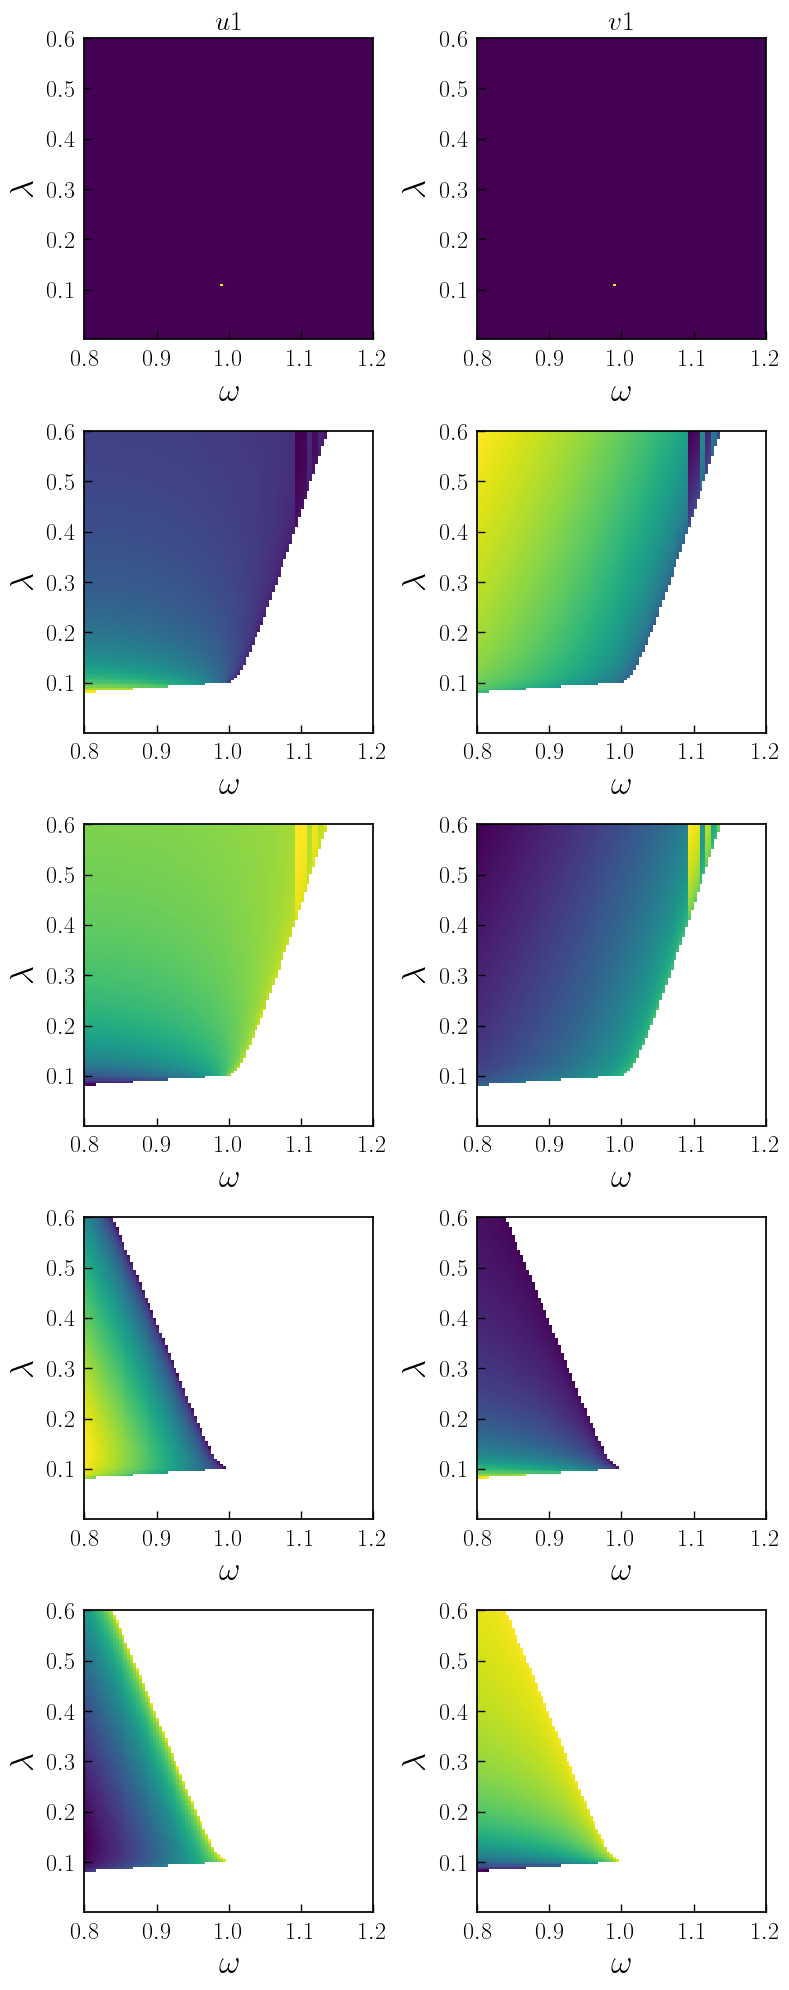

In [8]:
HarmonicBalance.plot_2D_solutions(phase_diagram,save_data=true)

In [9]:
data_2D = JLD2.load("plot_2D_solutions.jld2")
data_2D["panel (2,2)"]

Dict{Any, Any} with 4 entries:
  "solution #"                => 2
  "data"                      => [0.938791 0.934111 … NaN NaN; 0.93694 0.93225 …
  "(ω_min ω_max λ_min λ_max)" => [0.8, 1.2, 0.001, 0.6]
  "variable"                  => "v1"

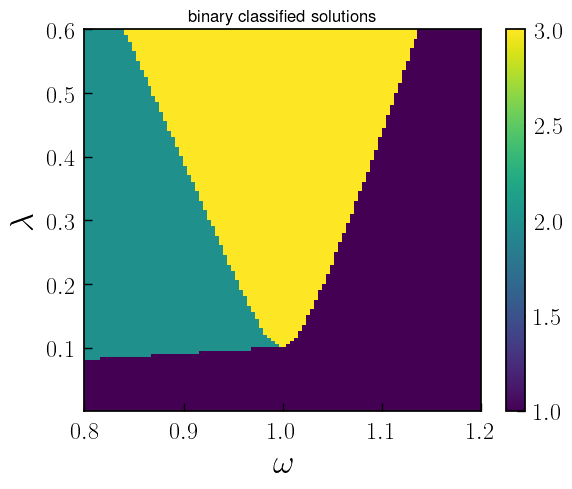

In [10]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="binary",save_data=true)

In [11]:
data_pd_2D = JLD2.load("plot_2D_phase_diagram.jld2")

Dict{String, Any} with 3 entries:
  "observable"                => "binary"
  "data"                      => [2 2 … 1 1; 2 2 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 …
  "(ω_min ω_max λ_min λ_max)" => [0.8, 1.2, 0.001, 0.6]

In [12]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=1,ncols=6,cut_dim="2",cut_type="solutions",observable="nsols",marker_classification=("ω^15* sqrt(u1^2 + v1^2) < 0.1" , "cool"))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:


In [13]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=1,cut_dim="1",cut_type="transform",observable="nsols",string_f=["u1^2+v1^2"])

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:


In [14]:
HarmonicBalance.plot_2D_solutions(phase_diagram)

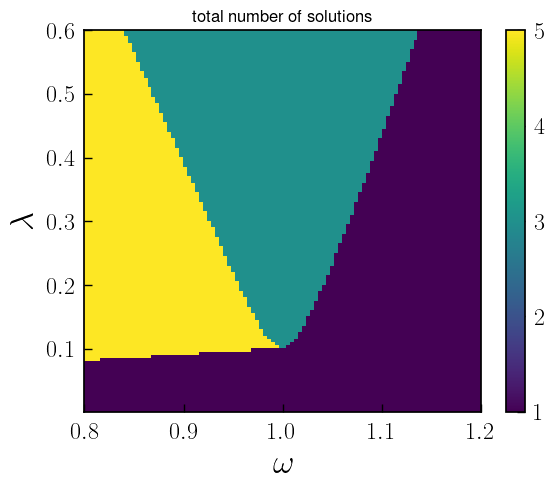

In [15]:
HarmonicBalance.plot_2D_phase_diagram(phase_diagram, stable=false,observable="nsols")

In [16]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=2,ncols=2,cut_dim="1",cut_type="solutions",string_f="a")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:


In [17]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(phase_diagram, stable=true, nrows=4,cut_dim="2",cut_type="jacobian_eigenvalues")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:


# coupled parametrons

In [18]:
@variables x, y, ω₁, ω₂,ω, γ,λ, t, T, ω, α₁, α₂, J;
@variables x(t), y(t);

In [19]:
#sympy object for the equation of motion
natural_equation = [d(d(x, t),t) + ω₁^2*(1-λ*cos(2*ω*t)) * x + γ*d(x,t)  + α₁*x^3 - J*y , 
                    d(d(y,t),t)  + ω₂^2*(1-λ*cos(2*ω*t)) * y + γ*d(y,t)  + α₂*y^3 - J*x] 


dEOM_coupled = HarmonicBalance.DifferentialEquation(natural_equation, [x, y])

HarmonicBalance.add_harmonic!(dEOM_coupled, x, ω) # x will rotate at ω
HarmonicBalance.add_harmonic!(dEOM_coupled, y, ω) # y will rotate at ω

show(dEOM_coupled)

@time averagedEOM_coupled = HarmonicBalance.get_harmonic_equations(dEOM_coupled, slow_time=T, fast_time=t)
@time problem_coupled = HarmonicBalance.Problem(averagedEOM_coupled)

"equations"

OrderedCollections.OrderedDict{Symbolics.Num, Symbolics.Equation} with 2 entries:
  x(t) => α₁*(x(t)^3) + γ*Differential(t)(x(t)) + (ω₁^2)*(1 - λ*cos(2t*ω))*x(t)…
  y(t) => α₂*(y(t)^3) + γ*Differential(t)(y(t)) + (ω₂^2)*(1 - λ*cos(2t*ω))*y(t)…

"harmonics"

OrderedCollections.OrderedDict{Symbolics.Num, Vector{Symbolics.Num}} with 2 entries:
  x(t) => [ω]
  y(t) => [ω]

  4.266380 seconds (6.18 M allocations: 330.763 MiB, 1.78% gc time, 92.32% compilation time)
  2.268658 seconds (2.91 M allocations: 176.711 MiB, 3.11% gc time, 98.06% compilation time)


4 algebraic equations for steady states
Variables: u1, v1, u2, v2
Parameters: α₁, ω, γ, ω₁, λ, J, α₂, ω₂
Symbolic Jacobian: true


# 2D phase diagram for two coupled parametrons

In [20]:
fixed_parameters = ParameterList([(ω₁, 1.),( ω₂, 1. ),(γ, 0.001 ),(α₁,  -0.01),(α₂, -0.01),(J,0.)])
swept_parameters = ParameterRange(ω => LinRange(0.,1.5, 100), λ => LinRange(0.001,0.6, 100))
result_coupled = HarmonicBalance.get_steady_states(problem_coupled, swept_parameters, fixed_parameters; random_warmup=true, threading=false)

Solving for 10000 parameters... 100%|███████████████████| Time: 0:00:27
  # parameters solved:  10000
  # paths tracked:      250000


A steady state result for 10000 parameter points

Solution branches:   25
   of which real:    25
   of which stable:  20

Classes: stable, physical, Hopf, binary_labels


In [21]:
#HarmonicBalance.save("coupled_parametrons.jld2", result_coupled);

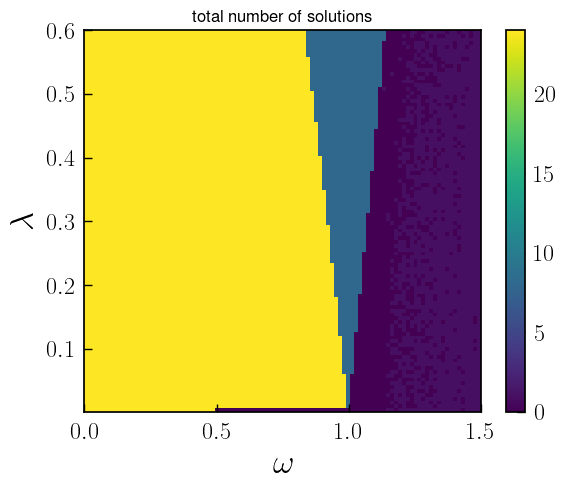

In [22]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=false);

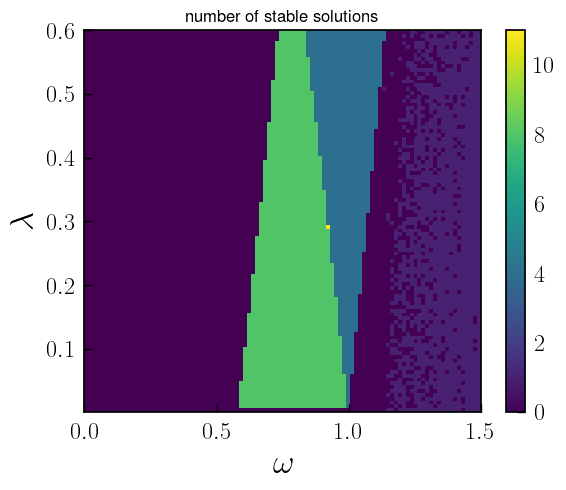

In [23]:
HarmonicBalance.plot_2D_phase_diagram(result_coupled, stable=true);

In [24]:
#HarmonicBalance.plot_2D_phase_diagram(phase_diagram, x="ω", y="λ", stable=false);
HarmonicBalance.plot_2D_phase_diagram_interactive(result_coupled, stable=false, nrows=3, ncols=3,cut_dim="1",cut_type="solutions",observable="nsols")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/hrochan/.julia/packages/PyCall/3fwVL/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'NoneType' object has no attribute 'get_array'")
  File "/usr/lib/python3/dist-packages/matplotlib/figure.py", line 2215, in colorbar
    cb = cbar.colorbar_factory(cax, mappable, **cb_kw)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1640, in colorbar_factory
    cb = Colorbar(cax, mappable, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/colorbar.py", line 1158, in __init__
    if mappable.get_array() is not None:
